In [1]:
# https://dacon.io/competitions/official/235930/codeshare/5236?page=1&dtype=recent

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, auc,roc_auc_score,average_precision_score

from sklearn.preprocessing import StandardScaler

In [3]:
train_df = pd.read_csv('../dataset/train.csv')
val_df = pd.read_csv('../dataset/val.csv')
test_df = pd.read_csv('../dataset/test.csv')

In [6]:
val_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


In [7]:
val_df.shape

(28462, 32)

In [8]:
val_df[val_df['Class'] == 1].shape

(30, 32)

In [12]:
# val_df.drop(columns=['ID']).corr().T.style.background_gradient(cmap='coolwarm')

In [14]:
val_fraud = val_df.loc[val_df['Class'] == 1]
val_fraud.shape

(30, 32)

In [15]:
val_ok = val_df.loc[val_df['Class'] == 0].sample(frac=1)
val_ok.shape

(28432, 32)

In [16]:
val_both = pd.concat([val_fraud, val_ok[:30]])
val_both.shape


(60, 32)

In [31]:
# val_ok = val_df.loc[val_df['Class'] == 0].sample(frac=1)
# val_ok.index

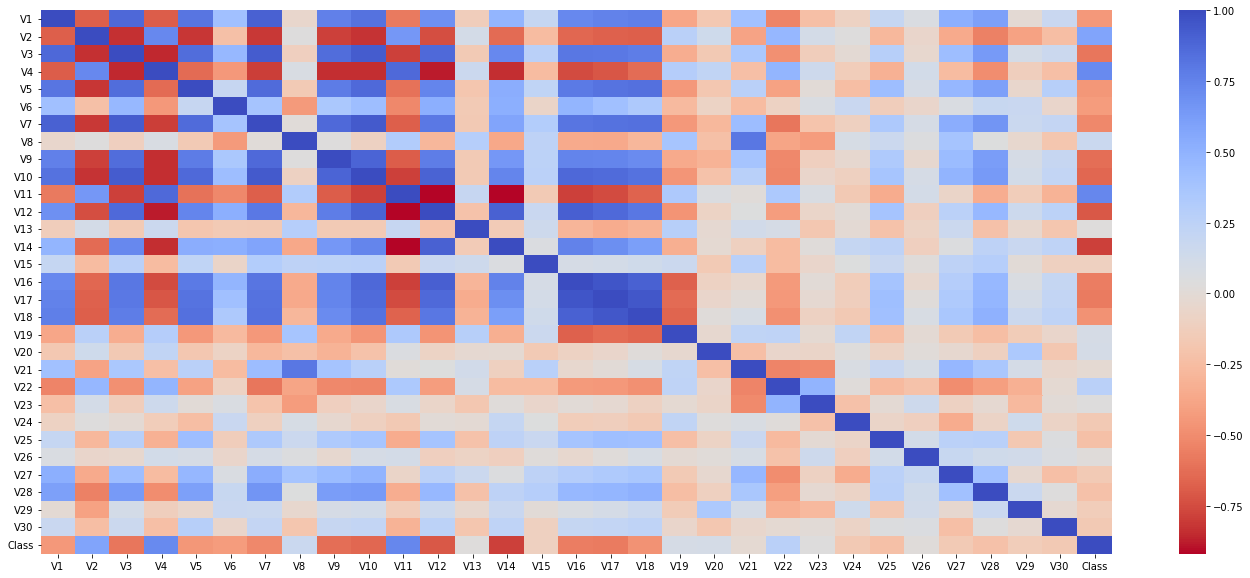

In [27]:
# f, (ax1, ax2) = plt.subplots(2, 1, figsize= (24, 20))

# corr = val_df.drop(columns=['ID']).corr()
# sns.heatmap(corr, cmap='coolwarm_r', ax=ax1)
# ax1.set_title('imbalanced')

val_ok = val_df.loc[val_df['Class'] == 0].sample(frac=1)
val_ok.shape

val_both = pd.concat([val_fraud, val_ok[:30]])
val_both.shape

f, ax = plt.subplots(1 ,1, figsize=(24,10))

corr_both = val_both.drop(columns=['ID']).corr()
sns.heatmap(corr_both, cmap='coolwarm_r', ax= ax)
ax2.set_title('balanced')

plt.show()

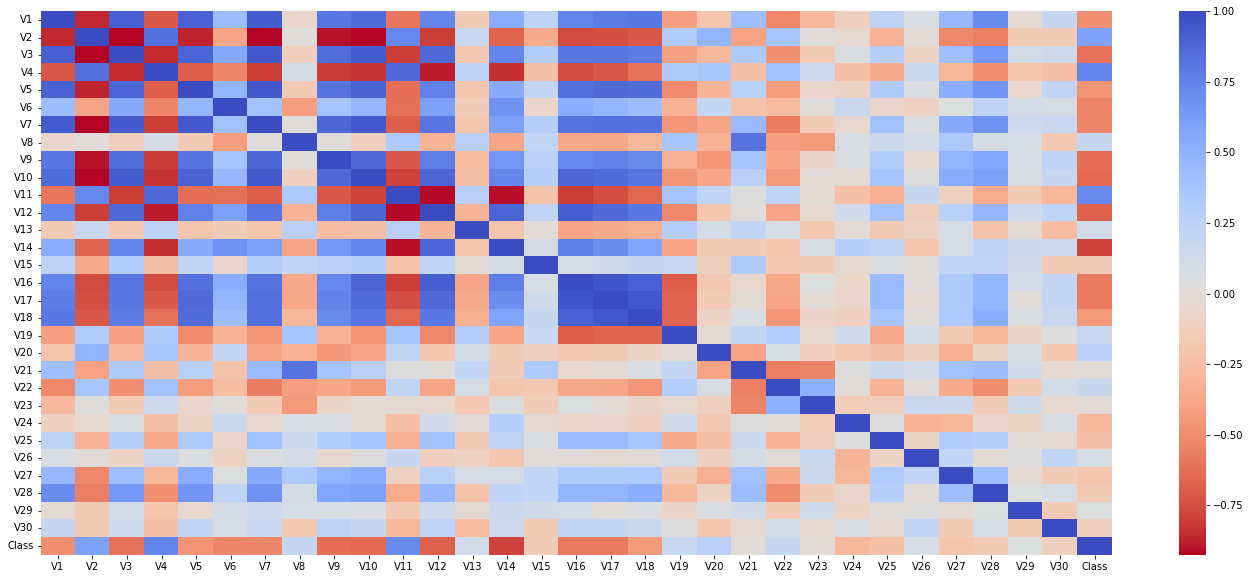

In [32]:
# f, (ax1, ax2) = plt.subplots(2, 1, figsize= (24, 20))

# corr = val_df.drop(columns=['ID']).corr()
# sns.heatmap(corr, cmap='coolwarm_r', ax=ax1)
# ax1.set_title('imbalanced')

val_ok = val_df.loc[val_df['Class'] == 0].sample(frac=1)
val_ok.shape

val_both = pd.concat([val_fraud, val_ok[:30]])
val_both.shape

f, ax = plt.subplots(1 ,1, figsize=(24,10))

corr_both = val_both.drop(columns=['ID']).corr()
sns.heatmap(corr_both, cmap='coolwarm_r', ax= ax)
ax2.set_title('balanced')

plt.show()

In [41]:
# val_both.drop(columns=['ID']).corr().T.style.background_gradient(cmap='coolwarm')

<AxesSubplot:xlabel='Class', ylabel='V11'>

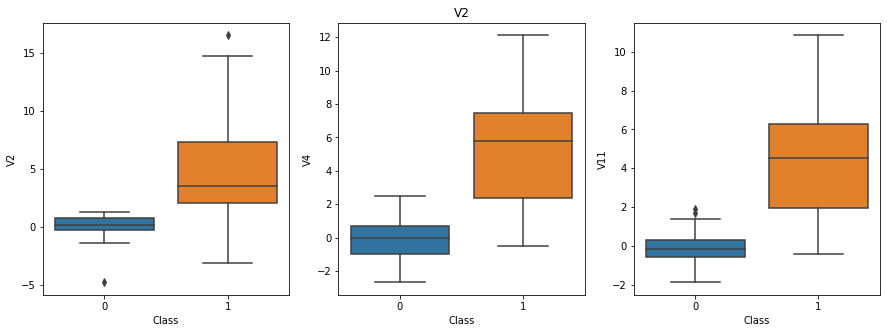

In [38]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

sns.boxplot(x='Class', y='V2', data=val_both, ax=ax1)
ax2.set_title('V2')

sns.boxplot(x='Class', y='V4', data=val_both, ax=ax2)

sns.boxplot(x='Class', y='V11', data=val_both, ax=ax3)

<AxesSubplot:xlabel='Class', ylabel='V9'>

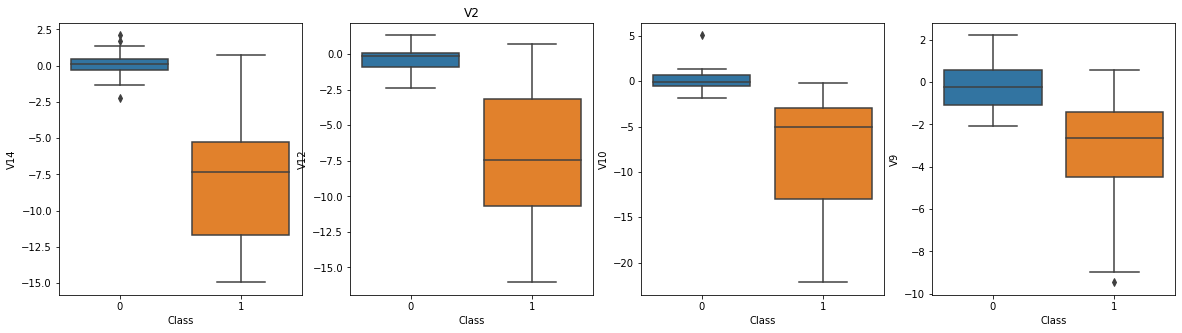

In [42]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,5))

sns.boxplot(x='Class', y='V14', data=val_both, ax=ax1)
ax2.set_title('V2')

sns.boxplot(x='Class', y='V12', data=val_both, ax=ax2)

sns.boxplot(x='Class', y='V10', data=val_both, ax=ax3)

sns.boxplot(x='Class', y='V9', data=val_both, ax=ax4)

## Dimensionality Reduction and Clustering:

In [61]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

X = val_both.drop('Class', axis=1)
print(X.shape)
y = val_both['Class']

# t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)

X_reduced_svd = TruncatedSVD(n_components=2, random_state=42, algorithm='randomized').fit_transform(X.values)

(60, 31)


/home/beomgon/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/beomgon/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 'SVD')

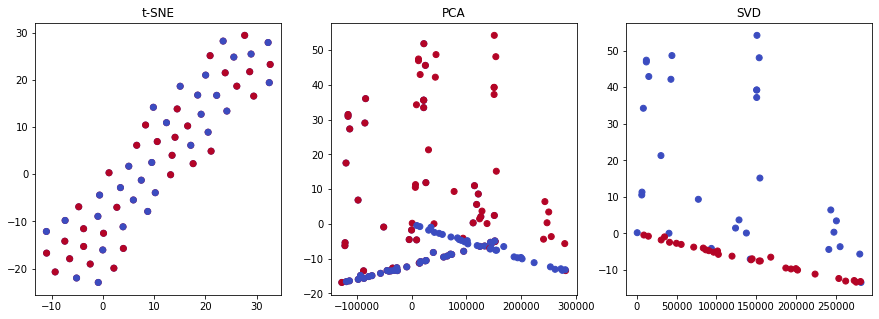

In [66]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))

ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y==0), cmap='coolwarm', label='No Fraud')
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y==1), cmap='coolwarm', label='Fraud')
ax1.set_title('t-SNE')

ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y==0), cmap='coolwarm', label='No Fraud')
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y==1), cmap='coolwarm', label='No Fraud')
ax2.set_title('PCA')


ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y==0), cmap='coolwarm', label='No Fraud')
ax2.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y==1), cmap='coolwarm', label='No Fraud')
ax3.set_title('SVD')

In [45]:
X_reduced_tsne.shape

(60, 2)

In [ ]:
# https://www.kaggle.com/code/matheusfacure/semi-supervised-anomaly-detection-survey/notebook

## Gaussian Model Based  

P(X)=P(x1)∗P(x2)∗...∗P(xd)

drawback : assumption of independent 


In [77]:
from scipy.stats import multivariate_normal


mu = train_df.drop(columns=['ID']).mean(axis=0).values
sigma = train_df.drop('ID', axis=1).cov().values
print(mu.shape, sigma.shape)

model = multivariate_normal(cov=sigma, mean=mu, allow_singular=True)

ok = model.logpdf(val_df[val_df['Class'] == 0].drop(columns=['Class', 'ID']).values)
ok.shape

fraud = model.logpdf(val_df[val_df['Class'] == 1].drop(columns=['Class', 'ID']).values)

(30,) (30, 30)


In [82]:
np.mean(fraud)
np.median(fraud)

-231.19549158653382

In [104]:
print(np.mean(ok),  np.mean(fraud))
print(np.median(ok), np.median(fraud))


-37.45171425168304 -640.3819965424586
-32.623629117539686 -231.19549158653382


In [88]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, fbeta_score, f1_score

In [107]:
tresholds = np.linspace(-1000,-10, 500)
scores = []
for treshold in tresholds:
    y_hat = (model.logpdf(val_df.drop(columns=['Class', 'ID']).values) < treshold).astype(int)
    # scores.append([recall_score(y_pred=y_hat, y_true=val_df['Class'].values),
    #              precision_score(y_pred=y_hat, y_true=val_df['Class'].values),
    #              fbeta_score(y_pred=y_hat, y_true=val_df['Class'].values, beta=2)])
    scores.append(f1_score(y_true=val_df['Class'].values, y_pred=y_hat))

scores = np.array(scores)
print(np.max(scores))
np.argmax(scores)

0.43999999999999995


0

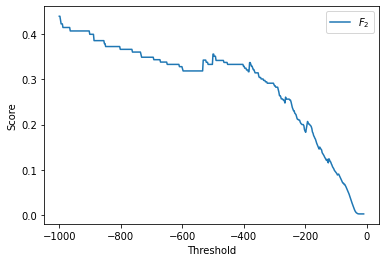

In [108]:
plt.plot(tresholds, scores, label='$F_2$')
plt.ylabel('Score')
# plt.xticks(np.logspace(-10, -200, 3))
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

## Histogram Based  
The model seen above is a parametric one in the sense the we only estimate the parameters of the multivariate distribution, namely the mean and covariance matrix. Another option is to use a non-parametric statistical technique. Here, we consider using histograms to model the normal data profile. Bellow, we see 5 histograms for different features in our data, both for normal and anomalous instances.

/home/beomgon/anaconda3/envs/pytorch/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/beomgon/anaconda3/envs/pytorch/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


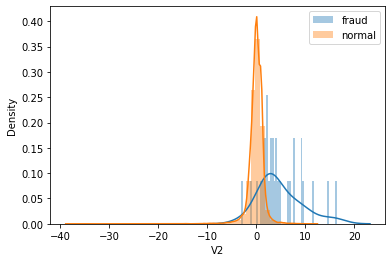

/home/beomgon/anaconda3/envs/pytorch/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/beomgon/anaconda3/envs/pytorch/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


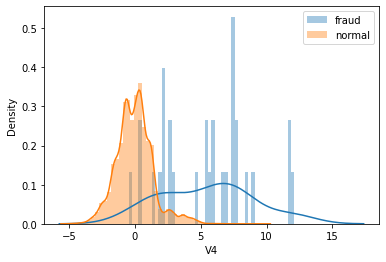

/home/beomgon/anaconda3/envs/pytorch/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/beomgon/anaconda3/envs/pytorch/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


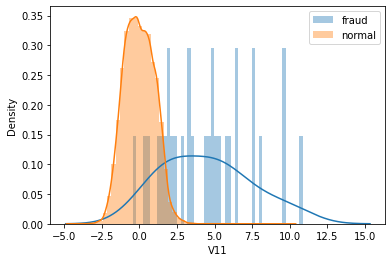

In [113]:
for feature in ['V2', 'V4', 'V11'] :
    ax = plt.subplot()
    sns.distplot(val_df[feature][val_df.Class == 1], bins=50, label = 'fraud')
    sns.distplot(val_df[feature][val_df.Class == 0], bins=50, label = 'normal')
    # ax.set_xlabel('')
    plt.legend(loc='best')
    plt.show()

## Cluster based technique

In [118]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, n_init=6, random_state=2)
gmm.fit(train_df.drop('ID', axis=1).values)

print(gmm.score(val_df[val_df['Class'] == 0].drop(columns=['ID', 'Class']).values))
print(gmm.score(val_df[val_df['Class'] == 1].drop(columns=['ID', 'Class']).values))

17.29311962501594
-122.35886143721815


In [119]:
tresholds = np.linspace(-400, 0, 400)
y_scores = gmm.score_samples(val_df.drop(columns=['ID', 'Class']).values)
scores = []
for treshold in tresholds:
    y_hat = (y_scores < treshold).astype(int)
    # scores.append([recall_score(y_pred=y_hat, y_true=valid['Class'].values),
    #              precision_score(y_pred=y_hat, y_true=valid['Class'].values),
    #              fbeta_score(y_pred=y_hat, y_true=valid['Class'].values, beta=2)])
    scores.append(f1_score(y_true=val_df['Class'].values, y_pred=y_hat))

scores = np.array(scores)
print(scores.max(), scores.argmax())

0.4878048780487804 195


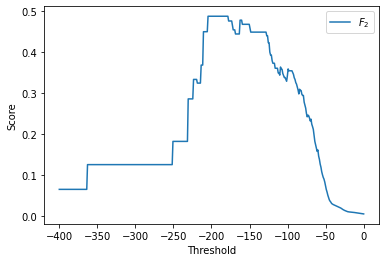

In [120]:
# plt.plot(tresholds, scores[:, 0], label='$Recall$')
# plt.plot(tresholds, scores[:, 1], label='$Precision$')
plt.plot(tresholds, scores, label='$F_2$')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

In [121]:
final_tresh = tresholds[scores.argmax()]
print(final_tresh)
y_hat_test = (gmm.score_samples(test.drop('Class', axis=1).values) < final_tresh).astype(int)

-204.51127819548873


In [122]:
from sklearn.svm import OneClassSVM
np.random.seed(42)

model = OneClassSVM(gamma=0.000562, nu=.95, kernel='rbf')
model.fit(train_df.drop('ID', axis=1).values)

print(model.decision_function(val_df[val_df['Class'] == 0].drop(columns=['ID', 'Class']).values))
print(model.decision_function(val_df[val_df['Class'] == 1].drop(columns=['ID', 'Class']).values))

[ -144.20783623 -1179.86391897  -567.71199953 ...  -395.06291303
  -201.62776468 -1025.12920452]
[ -4604.54964599 -17029.54188716 -18244.27991238 -62213.78216049
 -76949.52628413 -77702.84117577 -73554.4263894  -32107.53180154
 -11017.54393985 -73797.07121846 -81891.65837    -13237.88221672
  -1250.30566028  -6305.83151495  -7569.5127549   -4218.01193765
  -1198.65358775 -73213.01514537 -75990.77299595 -75990.77299595
 -96958.26122478 -90784.04042045 -31389.79242921  -4949.94753952
 -26880.20332378 -10533.26611955 -22523.21947419  -9971.49145642
  -5934.48078161   -836.26081097]


In [126]:
tresholds = np.linspace(-50000, -400, 500)
y_scores = model.decision_function(val_df.drop(columns=['Class','ID']).values)
scores = []
for treshold in tresholds:
    y_hat = (y_scores < treshold).astype(int)
    scores.append(f1_score(y_true=val_df['Class'].values, y_pred=y_hat))

scores = np.array(scores)
print(scores.max(), scores.argmax())

0.1896551724137931 0


## Isolation forest

In [128]:
from sklearn.ensemble import IsolationForest
np.random.seed(42)

model = IsolationForest(random_state=42, n_jobs=4, max_samples=train_df.shape[0], bootstrap=True, n_estimators=50)
model.fit(train_df.drop('ID', axis=1).values)
print(model.decision_function(val_df[val_df['Class'] == 0].drop(columns=['ID', 'Class']).values))
print(model.decision_function(val_df[val_df['Class'] == 1].drop(columns=['ID', 'Class']).values))

[0.15752288 0.1363032  0.15130821 ... 0.15263317 0.16508276 0.12604625]
[ 0.11409329 -0.07950693 -0.01878444 -0.21693593 -0.20579932 -0.20935069
 -0.163164   -0.08636645  0.00513406 -0.20636682 -0.22862203  0.04657357
  0.14834332  0.08358745  0.08124738  0.12370046  0.16423472 -0.20419267
 -0.19828268 -0.19828268 -0.25682488 -0.26104463 -0.1110143   0.12719861
 -0.03155819 -0.00948744 -0.04199001  0.05922513  0.0773357   0.15544597]


In [130]:
tresholds = np.linspace(-.2, .2, 200)
y_scores = model.decision_function(val_df.drop(columns=['Class','ID']).values)
scores = []
for treshold in tresholds:
    y_hat = (y_scores < treshold).astype(int)
    scores.append(f1_score(y_true=val_df['Class'].values, y_pred=y_hat))

scores = np.array(scores)
print(scores.max(), scores.argmax())

0.4545454545454545 1
